
Random Forest is a bagging algorithm rather than a boosting algorithm. They are two opposite way to achieve a low error.
We know that error can be composited from bias and variance. A too complex model has low bias but large variance, while a too simple model has low variance but large bias, both leading a high error but two different reasons. As a result, two different ways to solve the problem come into people's mind (maybe Breiman and others), variance reduction for a complex model, or bias reduction for a simple model, which refers to random forest and boosting.

It is an extension of bagging. The procedure is as follows, you take a bootstrap sample of your data and then use this to grow a classification or regression tree (CART). This is done a predefined number of times and the prediction is then the aggregation of the individual trees predictions, it could be a majority vote (for classification) or an average (for regression). This approach is called bagging (Breiman 1994). Furthermore the candidate variable for each split of each tree is taken from a random sample of all the available independent variables. This introduces even more variability and makes the trees more diverse. This is called the random subspace method (Ho, 1998). As mentioned, this produces trees which are very diverse which translates into trees which are highly independent of each other. Because of the Jensen's inequality we know that the average of the errors of these trees predictions will be smaller or equal to the error of the average tree grown from that data set. Another way to look at it is to look at the Mean Squared Error and notice how it can be decomposed in bias and variance parts (this is related to an issue in supervised learning called the bias-variance tradeoff). Random forest achieves better precision by reducing variance through the averaging of the prediction of orthogonal trees. It should be noted that it inherits the bias of its trees, which is quite a discussed problem, check for example this question.

https://stats.stackexchange.com/questions/77018/random-forest-is-it-a-boosting-algorithm


In signal processing, independent component analysis (ICA) is a computational method for separating a multivariate signal into additive subcomponents. This is done by assuming that the subcomponents are non-Gaussian signals and that they are statistically independent from each other. 

In [1]:
import pandas as pd
print('displaying the exoplanet train set (10)')
exo_train = pd.read_csv('exoTrain.csv')
display(exo_train[:10])
print('displaying the exoplanet test set (10)')
exo_test = pd.read_csv('exoTest.csv')
display(exo_test[:10])

displaying the exoplanet train set (10)


,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
5,2,211.10,163.57,179.16,187.82,188.46,168.13,203.46,178.65,166.49,...,-98.45,30.34,30.34,29.62,28.80,19.27,-43.90,-41.63,-52.90,-16.16
6,2,9.34,49.96,33.30,9.63,37.64,20.85,4.54,22.42,10.11,...,-58.56,9.93,9.93,23.50,5.28,-0.44,10.90,-11.77,-9.25,-36.69
7,2,238.77,262.16,277.80,190.16,180.98,123.27,103.95,50.70,59.91,...,-72.48,31.77,31.77,53.48,27.88,95.30,48.86,-10.62,-112.02,-229.92
8,2,-103.54,-118.97,-108.93,-72.25,-61.46,-50.16,-20.61,-12.44,1.48,...,43.92,7.24,7.24,-7.45,-18.82,4.53,21.95,26.94,34.08,44.65
9,2,-265.91,-318.59,-335.66,-450.47,-453.09,-561.47,-606.03,-712.72,-685.97,...,3671.03,2249.28,2249.28,2437.78,2584.22,3162.53,3398.28,3648.34,3671.97,3781.91


displaying the exoplanet test set (10)


,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,2,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,2,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,2,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,...,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,2,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,...,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84
5,1,14.28,10.63,14.56,12.42,12.07,12.92,12.27,3.19,8.47,...,3.86,-4.06,-3.56,-1.13,-7.18,-4.78,-4.34,7.67,-0.33,-7.53
6,1,-150.48,-141.72,-157.60,-184.60,-164.89,-173.87,-162.91,-167.04,-172.76,...,7.15,5.16,-9.08,-39.11,-32.31,-8.40,-16.80,-8.03,-12.73,-11.41
7,1,-10.06,-12.78,-13.16,-9.81,-18.91,-20.33,-22.85,-19.17,-17.97,...,21.49,30.63,24.19,33.00,35.70,35.89,-33.44,-30.83,-33.00,-20.15
8,1,454.66,440.60,382.29,361.63,298.63,253.29,155.86,110.38,31.71,...,-56.78,-61.64,-120.32,-65.39,-126.75,-78.18,-184.39,-142.31,-113.12,-111.78
9,1,187.40,209.60,199.91,179.62,171.21,161.84,163.02,171.61,113.53,...,-23.75,-35.72,-21.93,-16.47,-21.84,-26.64,-13.90,17.03,4.36,2.91


In [2]:
print ("EXOPLANET TRAIN dataset has {} data points with {} variables each.".format(*exo_train.shape))

# print ("ATLAS TRAIN dataset has {} data points with {} variables each.".format(train_data))
print ("EXOPLANET TEST dataset has {} data points with {} variables each.".format(*exo_test.shape))


EXOPLANET TRAIN dataset has 5087 data points with 3198 variables each.
EXOPLANET TEST dataset has 570 data points with 3198 variables each.


In [3]:
print('CREATING ACCURACY PERFOMANCE METRIC')
def performance_metric(y_true, y_predict):
    from sklearn.metrics import accuracy_score,roc_curve, roc_auc_score
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = accuracy_score(y_true, y_predict)

    # Return the score
    return score
print('CREATED PERFOMANCE METRIC')

CREATING ACCURACY PERFOMANCE METRIC
CREATED PERFOMANCE METRIC


In [8]:
from sklearn.ensemble import AdaBoostRegressor,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import ShuffleSplit
# print('fitting the data to an ADABOOSTREGRESSOR \n , params:= \n n_estimators:[200,150,100,50,25,20,10,5], \n learning_rate:[.7,.6,.5,.4,.25,.1], \n LOSS: linear, square,exponential')
print('fitting the RandomForestClassifier to a DECISIONTREECLASSIFIER \n \n \n  ')
def fit_model(x, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(x.shape[0], n_iter = 15, test_size = 0.30, random_state =None)
    
    # TODO: Create a decision tree regressor object
    classifier = RandomForestClassifier(DecisionTreeClassifier(criterion='entropy',max_depth=300,max_leaf_nodes=300,
                                                              min_samples_leaf=12, min_samples_split=9))

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'n_estimators':[150,75,50,5],
          'verbose':[True],
          'bootstrap':[True],
            'n_jobs':[-1],
              'oob_score':[True],
              'max_depth':[300,40,30,20,10,5],
              'max_features':['auto']
             }

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(classifier, params, scoring = scoring_fnc, cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(x, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

fitting the RandomForestClassifier to a DECISIONTREECLASSIFIER 
 
 
  


C:\Users\Hello\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [9]:
import pandas as pd
# ex_test = pd.read_csv('exoTest.csv')
# ex_train = pd.read_csv('exoTrain.csv')
label = exo_train[['LABEL']]
new_label = exo_train.drop(['LABEL'], axis = 1)
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test  = train_test_split(new_label,
                                                 label,
                                                 test_size=.3)
print(y_train[:5])


      LABEL
3846      1
461       1
3314      1
3308      1
1280      1


In [10]:
print(x_train[:5])


      FLUX.1  FLUX.2  FLUX.3  FLUX.4  FLUX.5  FLUX.6  FLUX.7  FLUX.8  FLUX.9  \
3846   16.46   35.27   53.93   61.25   66.21   86.89  107.61  136.11  159.24   
461  -259.91 -264.97 -247.56 -234.96 -185.27 -196.22 -109.35 -126.72 -123.88   
3314  -18.97  -16.58  -25.73  -23.34  -22.31  -21.93  -27.80  -32.03  -38.62   
3308    4.83    9.09    4.63    1.87    8.60    8.80    1.88    8.12    6.19   
1280  -22.56  -34.92  -28.64  -79.42  -28.08  -81.64  -35.17    1.11  -11.45   

      FLUX.10    ...      FLUX.3188  FLUX.3189  FLUX.3190  FLUX.3191  \
3846   198.06    ...          49.91      42.85      28.09      80.68   
461   -135.72    ...         -52.05     -97.82     -92.02     -59.57   
3314   -39.89    ...          61.49      72.30      78.54      82.62   
3308    -0.69    ...           6.76       5.48       4.58       5.52   
1280   -25.14    ...          34.41      21.86      54.02      37.97   

      FLUX.3192  FLUX.3193  FLUX.3194  FLUX.3195  FLUX.3196  FLUX.3197  
3846     137.

In [11]:
print(y_test[:5])

      LABEL
3098      1
4090      1
3172      1
759       1
1816      1


In [12]:
print(x_test[:5])

      FLUX.1  FLUX.2  FLUX.3  FLUX.4  FLUX.5  FLUX.6  FLUX.7  FLUX.8  FLUX.9  \
3098 -194.00 -176.47 -190.65 -168.86 -156.31 -125.26  -94.34  -88.17  -82.01   
4090  206.19   75.19   43.56 -113.12 -136.94 -211.31  -96.56   13.56   50.00   
3172  -56.85  -46.84  -52.29  -34.79  -35.51  -24.62  -28.87  -17.09  -15.52   
759   -28.46  -33.22  -22.07  -20.92  -10.48  -14.78  -16.82  -17.47   -4.00   
1816   -0.96   -1.91   -0.84   -4.70   -4.36    1.27   -9.18   -4.99   -0.89   

      FLUX.10    ...      FLUX.3188  FLUX.3189  FLUX.3190  FLUX.3191  \
3098   -61.29    ...         -33.48      23.55      11.22      12.89   
4090    41.75    ...          89.75      88.13     131.88    -100.75   
3172     9.03    ...           2.61      24.16       6.04      37.17   
759     -7.63    ...          12.70      14.45       6.44      -0.36   
1816    -5.24    ...           7.60      -0.23      -3.25       4.11   

      FLUX.3192  FLUX.3193  FLUX.3194  FLUX.3195  FLUX.3196  FLUX.3197  
3098      47.

In [13]:
print('COFFE BREAK \n FITTING THE GRID TO THE PARAMETERS.. \n NAPS ARE NICE TOO ^__^')
from sklearn.ensemble import AdaBoostClassifier
print('eta 1 hour 15 minutes')
clf = fit_model(x_train, y_train.values.ravel())
print('BEEP!! BEEP!!! BEEEEEPPP!!!')

print('eta 1 hour 15 minutes')

COFFE BREAK 
 FITTING THE GRID TO THE PARAMETERS.. 
 NAPS ARE NICE TOO ^__^
eta 1 hour 15 minutes


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    4.2s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    3.8s finished


KeyboardInterrupt: 

Definition 2.1  The margin function for a random forest is
         mr(X,Y) = PΘ(h(X,Θ)=Y)−maxj≠Y PΘ(h(X,Θ)= j)     (2)
and the strength of the set of classifiers  {h(x,Θ)} is
           s=E
X,Y
mr(X,Y)     

https://www.stat.berkeley.edu/~breiman/randomforest2001.pdf


i) Its accuracy is as good as AdaBoost and sometimes better.
ii) It's relatively robust to outliers and noise.
iii) It's faster than bagging or boosting. 
iv) It gives useful internal estimates of error, strength, correlation and variable importance. 
v) It's simple and easily parallelized


Definition 1.1  A random forest is a classifier consisting of a collection of treestructured classifiers  {h(x,Θk), k=1,...} where the {Θk} are independent identically distributed random vectors and each tree casts a unit vote for the most popular class at input  x .


In [ ]:
import math
# entropy = -sum(i) -(Pri)log2(Pri)

In [ ]:
from sklearn.decomposition import FastICA, PCA
print('transforming the ADABOOSTCLASSIFIER DATA')
ADB_CLF= AdaBoostClassifier((clf), n_estimators = 150, learning_rate = .4)
ADB_CLF.fit(x_train,y_train)

print('finished')


In [25]:
print(ADB_CLF)
ADB_CLF.score(x_test,y_test)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=40, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=True, random_state=None, verbose=True,
            warm_start=False),
          learning_rate=0.4, n_estimators=150, random_state=None)


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished


0.9927963326784545

In [26]:
pd.DataFrame(ADB_CLF.predict(x_test))

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished


,0
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [27]:
display(clf.decision_path(x_test))

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished


(<1527x2900 sparse matrix of type '<class 'numpy.int64'>'
 	with 493517 stored elements in Compressed Sparse Row format>,
 array([   0,   57,  110,  183,  238,  297,  362,  425,  478,  533,  588,
         645,  698,  745,  814,  865,  922,  959, 1024, 1083, 1130, 1201,
        1260, 1315, 1370, 1435, 1490, 1551, 1614, 1685, 1758, 1819, 1888,
        1929, 1992, 2049, 2106, 2149, 2202, 2263, 2324, 2379, 2446, 2505,
        2546, 2621, 2670, 2731, 2786, 2851, 2900], dtype=int32))

In [28]:
pd.DataFrame(ADB_CLF.decision_function(x_test))

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished


,0
0,-25.088454
1,-25.326376
2,-25.326376
3,-14.229003
4,-36.043653
5,-25.326376
6,-36.043653
7,-25.326376
8,-25.088454
9,-14.133254


In [29]:
print('RANDOM INDEPENDENT/PRINCIPAL COMPONENT ANALYSIS')


RANDOM INDEPENDENT/PRINCIPAL COMPONENT ANALYSIS


In [51]:
ICA1_CLF = FastICA(n_components= 2, algorithm='deflation', whiten=True, fun='logcosh', fun_args= {'alpha' :1.7}, max_iter=500, tol=0.0025, random_state=111111)

PCA_CLF = PCA(n_components=2,whiten=True,tol=.0025,random_state=111111, svd_solver ='arpack')
print('ICA CLF')
# ICA.fit(x_train) #y ignored
print(ICA1_CLF)

print('PCA CLF')
print(PCA_CLF)

ICA CLF
FastICA(algorithm='deflation', fun='logcosh', fun_args={'alpha': 1.7},
    max_iter=500, n_components=2, random_state=111111, tol=0.0025,
    w_init=None, whiten=True)
PCA CLF
PCA(copy=True, iterated_power='auto', n_components=2, random_state=111111,
  svd_solver='arpack', tol=0.0025, whiten=True)


In [52]:
print('transforming the Ica data')
ICA_CLF_T = ICA1_CLF.fit_transform(x_train)
print('transforming the Pca data')
PCA_CLF_T = PCA_CLF.fit_transform(x_train)

print('finished')


transforming the Ica data
transforming the Pca data
finished


In [53]:
pd.DataFrame(ADB_CLF.feature_importances_)

,0
0,0.000000e+00
1,0.000000e+00
2,4.467287e-04
3,1.772522e-04
4,1.467225e-05
5,5.774768e-05
6,0.000000e+00
7,2.258460e-04
8,4.160430e-07
9,0.000000e+00


In [54]:
display(ADB_CLF.score(x_test,y_test))

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished


0.9927963326784545

In [55]:
print(ADB_CLF.score(x_test[9:10],y_test[9:10]))
print(ADB_CLF.score(x_test[19:20],y_test[19:20]))
print(ADB_CLF.score(x_test[200:201],y_test[200:201]))
print(ADB_CLF.score(x_test[400:401],y_test[400:401]))
print(ADB_CLF.score(x_test[500:501],y_test[500:501]))
print(ADB_CLF.score(x_test[450:451],y_test[450:451]))
print(ADB_CLF.score(x_test[50:51],y_test[50:51]))



[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished


1.0


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished


1.0


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished


1.0


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished


1.0


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished


1.0


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished


1.0


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    0.0s finished


1.0


CREATING VISUAL


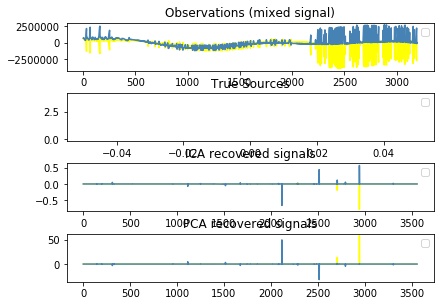

In [56]:
from matplotlib import pyplot as plt
print('CREATING VISUAL')

models = [ICA1_CLF.mixing_, exo_train, ICA_CLF_T,PCA_CLF_T]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals',
        'PCA recovered signals']
colors = ['yellow', 'steelblue', 
         'black','green',
         'red']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    plt.legend(models)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)


plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.show()



ValueError: c of shape (3560, 1) not acceptable as a color sequence for x with size 3197, y with size 3197

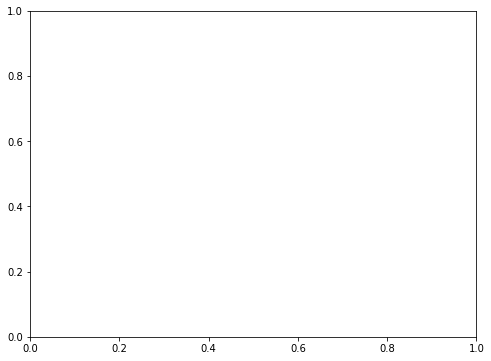

In [65]:
import numpy as np
plt.figure(2, figsize=(8, 6))
plt.clf()


x_min, x_max = np.min(x_train), np.max(x_train)
y_min, y_max = np.min(y_train), np.max(y_train)
# Plot the training points
plt.scatter(x_min, x_max, c=y_train, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

ax.scatter(x_train, PCA_CLF_T,
           cmap=plt.cm.Set1, edgecolor='k')
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [25]:
        from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import ShuffleSplit
print('fitting the data to a  GradientBoostingClassifier \n , params:= \n n_estimators:[200,150,100,50,25,20,10,5], \n learning_rate:[.7,.6,.5,.4,.25,.1], \n LOSS: deviance, exponential \n criterion = friedman_mse,mse,mae')

def clf_fit_model(x, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(x.shape[0], n_iter = 15, test_size = 0.20, random_state =None)
    params = {'n_estimators':[200,150,100,50,25,20,10,5],
          'learning_rate':[.7,.6,.5,.4,.25,.1],
          'random_state':[1222,164]
          }
    # TODO: Create a decision tree regressor object
    classifier = AdaBoostClassifier(DecisionTreeClassifier(criterion='gini',max_depth=300,max_leaf_nodes=300, min_samples_leaf=12, min_samples_split=9))

#     # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
#     params = {'n_estimators':[200,150,100,50,25,20,10,5],
#           'learning_rate':[.7,.6,.5,.4,.25,.1],
#           'loss':['linear','square','exponential'],
#              }

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(classifier, params, scoring = scoring_fnc, cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(x, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

fitting the data to a  GradientBoostingClassifier 
 , params:= 
 n_estimators:[200,150,100,50,25,20,10,5], 
 learning_rate:[.7,.6,.5,.4,.25,.1], 
 LOSS: deviance, exponential 
 criterion = friedman_mse,mse,mae


In [26]:
print('COFFE BREAK \n FITTING THE GRID TO THE PARAMETERS.. \n NAPS ARE NICE TOO ^__^')
clf = clf_fit_model(x_train, y_train.ravel())
print('BEEP!! BEEP!!! BEEEEEPPP!!!')

COFFE BREAK 
 FITTING THE GRID TO THE PARAMETERS.. 
 NAPS ARE NICE TOO ^__^
BEEP!! BEEP!!! BEEEEEPPP!!!


In [ ]:
print('RANDOM I.C. ANALYSIS')

In [ ]:
ICA1_CLF = FastICA(n_components= 4, algorithm='deflation', whiten=True, fun='logcosh', fun_args= {'alpha' :1.5}, max_iter=500, tol=0.0025, random_state=111111)
ICA1_CLF.fit(x_train)
print('ICA CLF')
# ICA.fit(x_train) #y ignored
print(ICA1_CLF)

In [ ]:
print('transforming the ica,pca data')
ICA_CLF_T = ICA.fit_transform(x_train)


print('finished')


In [ ]:
print('CREATING VISUAL')

models = [ICA1.mixing_, x_train, ICA_CLF_T]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals']
colors = ['red', 'steelblue', 'orange','purple',
         'green']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    plt.legend(models)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)


# plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.show()


In [ ]:
print('CREATING VISUAL')

models = [ICA1.mixing_, x_train, ICA_CLF_T]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals']
colors = ['red', 'steelblue', 'orange','purple',
         'green']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    plt.legend(models)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)


# plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.show()


In [46]:
print(x_train.shape[0])
print(y_train.shape[0])

3000
3000


In [53]:
pd.DataFrame(x_train)
print('Y TRAIN')
pd.DataFrame(y_train)


Y TRAIN


,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


In [89]:
print(reg.score)

print(reg.estimator_errors_)
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
print(reg.score(x_test,y_test))
print(reg.predict(x_test))
print('X TEST')
display(x_test[:5])
print('Y TEST')
display(y_test[:5])
print('X TRAIN')
display(x_train[:5])
print('Y TRAIN')
display(y_train[:5])
print(x_train.shape[0])
print(y_train.shape[0])

<bound method RegressorMixin.score of AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mae', max_depth=300, max_features=1008,
           max_leaf_nodes=300, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=12,
           min_samples_split=9, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=0.7, loss='linear', n_estimators=200,
         random_state=None)>
[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1.

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import FastICA, PCA
print('LETS CHECK OUT THE INDEPENDENT COMPONENT ANALYSIS')

LETS CHECK OUT THE INDEPENDENT COMPONENT ANALYSIS


In [39]:
from sklearn.decomposition import FastICA
ICA = FastICA(n_components= 4, algorithm='deflation', whiten=True, fun='logcosh', fun_args= {'alpha' :1.5}, max_iter=500, tol=0.0025, random_state=None)
print(ICA)


FastICA(algorithm='deflation', fun='logcosh', fun_args={'alpha': 1.5},
    max_iter=500, n_components=4, random_state=None, tol=0.0025,
    w_init=None, whiten=True)


In [40]:
from sklearn.decomposition import PCA
PCA = PCA(n_components= 4, svd_solver='randomized', whiten=True, tol=0.0025, iterated_power=500)
print(PCA)


PCA(copy=True, iterated_power=500, n_components=4, random_state=None,
  svd_solver='randomized', tol=0.0025, whiten=True)


In [41]:
print('FITTING/transforming the ica,pca data')
print('ICA')
ICA = ICA.fit_transform(x_train)
print('STARTING PCA')
PCA = PCA.fit_transform(x_train)

print('finished')


FITTING/transforming the ica,pca data
ICA
STARTING PCA
finished


refitting to create the visual
FastICA(algorithm='deflation', fun='logcosh', fun_args={'alpha': 1.5},
    max_iter=500, n_components=4, random_state=11111, tol=0.0025,
    w_init=None, whiten=True)
making vis


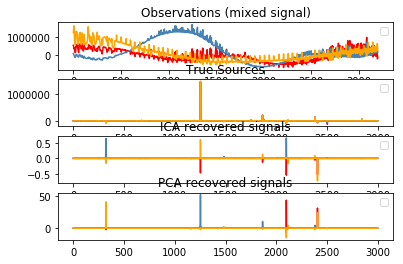

In [50]:
print('refitting to create the visual')
from sklearn.decomposition import FastICA
ICA1= FastICA(n_components= 4, algorithm='deflation', whiten=True, fun='logcosh', fun_args= {'alpha' :1.5}, max_iter=500, tol=0.0025, random_state=11111)
print(ICA1)
ICA1.fit(x_train)


print('making vis')

models = [ICA1.mixing_, x_train, ICA, PCA]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals',
         'PCA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    plt.legend(models)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)


# plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.show()

In [52]:

pd.DataFrame(ICA1.mixing_)

,0,1,2,3
0,540939.044324,74114.486668,1.263286e+06,485274.742942
1,536382.454536,68441.372560,1.283827e+06,483969.608486
2,520182.714285,56714.405780,1.331607e+06,427112.547630
3,486431.761113,48242.362221,1.428792e+06,307522.893686
4,440245.130499,34537.029177,1.537833e+06,137166.671000
5,398319.292181,20745.263023,1.621320e+06,-31864.918446
6,355245.285097,4320.396100,1.629135e+06,-117645.717741
7,352410.378531,-5128.032271,1.545080e+06,-40748.896876
8,367237.354002,-14333.459813,1.394869e+06,106217.093674
9,385502.514965,-22058.060969,1.237396e+06,251204.074143


In [ ]:
plt.plot(ICA.mixing_)
plt.show()

In [46]:
print('Lets check the Principal Component Analysis')

Lets check the Principal Component Analysis


In [49]:
from sklearn.decomposition import PCA
PCA = PCA(n_components= 4, svd_solver='randomized', whiten=True, tol=0.0025, iterated_power=500)
print(PCA)
print('fitting the  PCA ')
PCA.fit(x_train) #y ignored
print('all done ^__^')

PCA(copy=True, iterated_power=500, n_components=4, random_state=None,
  svd_solver='randomized', tol=0.0025, whiten=True)
fitting the  PCA 
all done ^__^


In [50]:
print('transforming the PCA data')
PCA.fit_transform(x_train)
print('finished')

transforming the PCA data
finished


In [45]:

mix = ICA.mixing_
mean= ICA.mean_


models = [mix, x_train, ICA.fit_transform(x_train), PCA.fit_transform(x_train)]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals',
         'PCA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    plt.legend(models)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)


# plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
plt.show()

NameError: name 'ICA' is not defined

In [ ]:
print('that was fun.. time for the actual analyzing ')

In [60]:
pd.DataFrame(x_Train)

,0,1,2,3,4,5,6,7,8,9,...,3187,3188,3189,3190,3191,3192,3193,3194,3195,3196
0,-18.31,4.13,76.75,9.38,-9.81,5.44,-63.56,27.00,-65.00,-7.56,...,57.00,41.69,75.75,99.63,59.88,71.57,-0.69,86.07,171.57,75.00
1,-34.33,-32.28,-40.90,21.74,4.61,-6.79,5.96,6.77,-0.68,-3.37,...,-7.31,-23.54,-31.36,-12.01,-0.92,-4.22,7.97,33.43,20.08,52.63
2,-0.27,-4.88,-0.23,-0.66,-2.30,11.62,-1.82,-0.39,2.91,0.83,...,4.26,9.59,11.63,10.33,10.68,9.02,8.87,12.61,7.84,10.18
3,-7.81,-7.97,-10.10,-7.18,-6.37,-5.71,-11.40,-12.06,-8.82,-13.77,...,17.75,29.47,30.04,19.55,24.50,23.20,25.64,24.25,21.12,23.55
4,128.71,82.93,81.93,-14.92,-32.48,-52.90,-68.76,-122.28,-110.59,-126.03,...,-195.64,-136.14,-100.68,-120.93,-144.78,-75.18,-192.45,-186.62,-154.68,-148.03
5,-3.17,-14.06,-0.86,-7.83,-6.19,-4.86,-6.66,-6.85,-10.87,-9.92,...,-0.64,6.41,4.29,-3.75,-4.45,-5.24,-10.08,-1.93,-2.11,-1.14
6,227.72,188.61,210.38,193.76,165.76,174.02,167.70,174.46,144.67,138.38,...,1.59,14.82,-9.27,30.80,17.86,14.79,-20.41,-3.69,7.04,-7.66
7,7.69,0.24,2.85,4.16,21.55,0.87,8.17,-3.70,-0.27,-10.32,...,7.16,7.25,10.85,1.15,7.52,4.80,11.78,16.02,12.61,8.17
8,167.13,176.70,225.98,215.71,187.91,143.23,115.93,118.84,117.99,122.22,...,54.96,121.89,97.81,86.90,140.41,129.00,-276.35,-175.57,-202.87,-153.03
9,19.82,11.78,-7.57,20.52,19.86,17.15,26.63,8.29,10.89,22.06,...,3.53,15.01,3.15,-4.28,27.40,0.46,19.61,16.12,31.12,18.93


In [141]:
import pandas as pd
# ex_test = pd.read_csv('exoTest.csv')
# ex_train = pd.read_csv('exoTrain.csv')
label = exo_train[['LABEL']]
new_label = exo_train.drop(['LABEL'], axis = 1)
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test  = train_test_split(new_label,
                                                 label,
                                                 test_size=.4)
print(x_train[:5])
print(y_train[:5])
print(x_test[:5])
print(y_test[:5])

      FLUX.1  FLUX.2  FLUX.3  FLUX.4  FLUX.5  FLUX.6  FLUX.7  FLUX.8  FLUX.9  \
2233  128.17  124.67  113.75  108.95   93.22   74.96   54.90   38.61   26.54   
172    23.69   33.61   25.90   17.39    3.60   17.10    5.25   22.64   -4.31   
3705    3.93   -3.93   -4.55   -0.81   -4.89   -2.84   -5.27   -0.35   -3.57   
1585   30.01   42.47   25.59   27.33   38.41   26.70   24.14   16.66   23.63   
4310   26.39   25.00   19.80   20.98   19.89   11.63   15.54   12.78   10.82   

      FLUX.10    ...      FLUX.3188  FLUX.3189  FLUX.3190  FLUX.3191  \
2233    19.62    ...          19.19      26.91      18.64      24.87   
172      4.40    ...          23.14      14.76      18.82      -2.69   
3705    -0.19    ...          -5.93       1.95       1.35      -1.32   
1585    21.81    ...          24.51      34.49      24.45      14.93   
4310    12.27    ...          -2.84      -2.64       4.37       8.24   

      FLUX.3192  FLUX.3193  FLUX.3194  FLUX.3195  FLUX.3196  FLUX.3197  
2233      30.

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor



regressor = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mae', max_depth=300, max_features=1008,
           max_leaf_nodes=300, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=12,
           min_samples_split=9, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=0.7, loss='linear', n_estimators=200,
         random_state=None)
print(' MODEL TUNED TO THESE SPECIFIC PARAMETERS' , regressor)
print('fitting the model')
regressor.fit(x_train, y_train)
print('model fitted')
display(x_train[:5])
display(y_train[:5])
display(x_test[:5])
display(y_test[:5])
# TODO: Report the score of the prediction using the testing set
print('Generating Score')
score = regressor.score(x_test, y_test)
print('Score:-> {:.4f} '.format(score))

 MODEL TUNED TO THESE SPECIFIC PARAMETERS AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mae', max_depth=300, max_features=1008,
           max_leaf_nodes=300, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=12,
           min_samples_split=9, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=0.7, loss='linear', n_estimators=200,
         random_state=None)
fitting the model
model fitted


C:\Users\Hello\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ -18.31,    4.13,   76.75, ...,   86.07,  171.57,   75.  ],
       [ -34.33,  -32.28,  -40.9 , ...,   33.43,   20.08,   52.63],
       [  -0.27,   -4.88,   -0.23, ...,   12.61,    7.84,   10.18],
       [  -7.81,   -7.97,  -10.1 , ...,   24.25,   21.12,   23.55],
       [ 128.71,   82.93,   81.93, ..., -186.62, -154.68, -148.03]])

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

array([[  119.88,   100.21,    86.46, ...,    35.78,   269.43,    57.72],
       [ 5736.59,  5699.98,  5717.16, ..., -2366.19, -2294.86, -2034.72],
       [  844.48,   817.49,   770.07, ...,  -162.68,   -36.79,    30.63],
       [ -826.  ,  -827.31,  -846.12, ...,  -120.81,  -257.56,  -215.41],
       [  -39.57,   -15.88,    -9.16, ...,   -61.98,   -69.34,   -17.84]])

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

Generating Score
Score:-> -0.0088 


In [144]:
print('fun with graphs')

fun with graphs


In [147]:
# outliers = np.abs(x_train- np.mean(x_train)) / np.std(x_train)
# display(outliers[60])
def reject_outliers(x, m = 2.):
    d = np.abs(x_train - np.median(x_train))
    mdev = np.median(d)
    s = d/mdev if mdev else 0.
    return x_train[s<m]

def reject_outliers_2(data, m = 2.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/(mdev if mdev else 1.)
    return data[s<m]

display(x_train[789])
display(reject_outliers(x_train[789]))
display(reject_outliers_2(x_train[789]))

KeyError: 789

In [ ]:
plt.title('x,y train(10)') 
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.plot(x_train[600]

plt.show()


TypeError: only integer scalar arrays can be converted to a scalar index

In [135]:
import pandas as pd
# ex_test = pd.read_csv('exoTest.csv')
# ex_train = pd.read_csv('exoTrain.csv')
label = exo_train[['LABEL']]
new_label = exo_train.drop(['LABEL'], axis = 1)
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test  = train_test_split(new_label,
                                                 label,
                                                 test_size=.4)
print(x_train[:5])
print(y_train[:5])
print(x_test[:5])
print(y_test[:5])


      FLUX.1  FLUX.2  FLUX.3  FLUX.4  FLUX.5  FLUX.6  FLUX.7  FLUX.8  FLUX.9  \
4537   10.99    7.28   12.65   13.51   -0.78    6.68   11.52   11.73    7.89   
3612   -0.14    0.70   -5.18   -1.60   -2.08    3.06   -3.58    0.31   -5.86   
4267  -68.10  -56.34  -49.44   -3.82  -56.86  -28.65   -7.21  -18.67   16.88   
4439  -25.69  -47.66  -36.47  -28.12  -42.82  -62.66  -65.80  -67.69  -62.04   
83    168.80  174.10  177.41  175.61  146.71  133.01  110.11  108.62   99.65   

      FLUX.10    ...      FLUX.3188  FLUX.3189  FLUX.3190  FLUX.3191  \
4537    11.64    ...           3.20       4.86      -0.10       5.31   
3612    -3.17    ...           0.10       2.41       3.72       3.39   
4267    23.09    ...         -66.03    -101.04    -105.67    -110.29   
4439   -74.87    ...         -40.54     -61.30    -101.23     -92.23   
83      94.88    ...          21.72       3.76      13.40       4.26   

      FLUX.3192  FLUX.3193  FLUX.3194  FLUX.3195  FLUX.3196  FLUX.3197  
4537       7.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
regressor = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mae', max_depth=300, max_features=1008,
           max_leaf_nodes=300, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=12,
           min_samples_split=9, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=0.7, loss='linear', n_estimators=200,
         random_state=None)
regressor.fit(x_train, y_train)
display(x_train[:5])
display(y_train[:5])
display(x_test[:5])
display(y_test[:5])
# TODO: Report the score of the prediction using the testing set
score = regressor.score(x_test, y_test)
print('Score:-> {:.4f} '.format(score))

C:\Users\Hello\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [106]:
from sklearn.ensemble import GradientBoostingRegressor
params = {'n_estimators': 1200, 'max_depth': 30, 'min_samples_split': 12,
          'learning_rate': 0.5, 'loss': 'huber', 'alpha': .4}
GBR = GradientBoostingRegressor(**params)

GBR.fit(x_train, y_train.ravel())
GBR.score(x_test,y_test)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [109]:
from sklearn import metrics
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3, random_state=1).fit(x_train,y_train)
labels = kmeans_model.labels_
print(metrics.calinski_harabaz_score(x_train, labels))
print('{:.2f}'.format(metrics.silhouette_score(x_train, labels, metric='euclidean')))

7002.363011607264
0.99


In [ ]:
import visuals as vs
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(x_train)
pca_samples = pca.transform(x_train[:500])



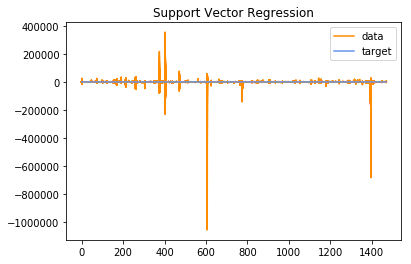

In [113]:
plt.plot(x_train, color='darkorange',label='data')
plt.plot(y_train, color='cornflowerblue',label='target')
# plt.plot(x_train, y_train, color='darkorange', label='data')
plt.title('Support Vector Regression')
plt.legend()
plt.show()